# Examples

Let's figure out how to perform k-fold cross validation. For this, we will use the university acceptance dataset from Monday again. If you need to download it again, do so at this [link](https://drive.google.com/open?id=13HPgfc4HP9UP-gHM2lutJ7MXSt-dAL1d)

We will first start by creating a multivariate model, and assessing it's accuracy.

In [1]:
import numpy as np 

import pandas as pd 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

In [2]:
#Load data 

data=pd.read_csv('../uni_admission.csv')

In [3]:
X=data[['GRE', 'TOEFL', 'SOP', 'LOR']].values
y=data['admit_chance'].values 

print(X)
print(y)

[[337.  118.    4.5   4.5]
 [324.  107.    4.    4.5]
 [316.  104.    3.    3.5]
 ...
 [330.  120.    4.5   5. ]
 [312.  103.    4.    5. ]
 [327.  113.    4.5   4.5]]
[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0.76 0.71 0.8  0.78
 0.84 0.9  0.92 0.97 0.8  0.81 0.75 0.83 0.96 0.79 0.93 0.94 0.86 0.79
 0.8  0.77 0.7  0.65 0.61 0.52 0.57 0.53 0.67 0.68 

 Train using 80% of the data.


In [4]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
regressor=LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [6]:
# assess the accuraccy of the model
y_pred=regressor.predict(X_test)

In [7]:
from sklearn import metrics 

print(' The Mean Absolute error is' ,  metrics.mean_absolute_error(y_test,y_pred))
print(' The Mean Squared error is' , metrics.mean_squared_error(y_test,y_pred))
print(' The Root  Mean Absolute error is' , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

 The Mean Absolute error is 0.05691472219785118
 The Mean Squared error is 0.00572592647322867
 The Root  Mean Absolute error is 0.0756698518118588


Cross Validation with KFold 

In [8]:
from sklearn.model_selection import KFold

In [9]:
X=data[['GRE','TOEFL', 'SOP','LOR']].values
y=data['admit_chance'].values

print(X)
print(y)

[[337.  118.    4.5   4.5]
 [324.  107.    4.    4.5]
 [316.  104.    3.    3.5]
 ...
 [330.  120.    4.5   5. ]
 [312.  103.    4.    5. ]
 [327.  113.    4.5   4.5]]
[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0.76 0.71 0.8  0.78
 0.84 0.9  0.92 0.97 0.8  0.81 0.75 0.83 0.96 0.79 0.93 0.94 0.86 0.79
 0.8  0.77 0.7  0.65 0.61 0.52 0.57 0.53 0.67 0.68 

In [10]:
folds=KFold(n_splits=5)

In [11]:
print("We are using " + str(folds.get_n_splits(X)) + ' Folds')

We are using 5 Folds


In [15]:
RMSES=[]
count=1

for train_index, test_index in folds.split(X):

    print('\n Training model' + str(count))

    X_train, X_test= X[train_index], X[test_index]
    y_train, y_test= y[train_index],y[test_index]

    regressor=LinearRegression()
    regressor.fit(X_train, y_train)

    y_pred=regressor.predict(X_test)

    rmse_value=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

    RMSES.append(rmse_value)

    print('Model' + str(count) + ' Root Mean Squred Error:', rmse_value)

    count+=1

print(count)






 Training model1
Model1 Root Mean Squred Error: 0.024401622982641036

 Training model2
Model2 Root Mean Squred Error: 0.042513291674767695

 Training model3
Model3 Root Mean Squred Error: 0.026521125481557606

 Training model4
Model4 Root Mean Squred Error: 0.061805821570335207

 Training model5
Model5 Root Mean Squred Error: 0.006912571597449291

 Training model6
Model6 Root Mean Squred Error: 0.05686400552453519

 Training model7
Model7 Root Mean Squred Error: 0.014819417407394564

 Training model8
Model8 Root Mean Squred Error: 0.03003873568922033

 Training model9
Model9 Root Mean Squred Error: 0.029773658207268516

 Training model10
Model10 Root Mean Squred Error: 0.2987841058876632

 Training model11
Model11 Root Mean Squred Error: 0.2584960408670258

 Training model12
Model12 Root Mean Squred Error: 0.001618719865401519

 Training model13
Model13 Root Mean Squred Error: 0.07312931302600778

 Training model14
Model14 Root Mean Squred Error: 0.06189784596606207

 Training model15

In [13]:
from sklearn.model_selection import LeaveOneOut

# We will use the same 4 independent variables for this

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 500 folds
trained 501 models


0.05209496129447932

`In this scenario it is also helpful to plot out the RMSE values across all models`

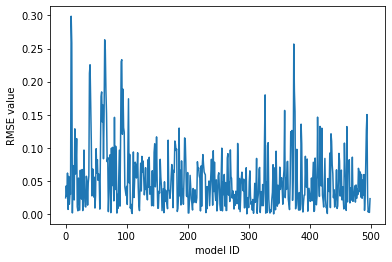

In [14]:
import matplotlib.pyplot as plt 

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

All in all, this indicates to us that it would be challenging to create a model that beats the ~0.05 average RMSE using this dataset. This is the benefit of using Leave One Out Cross validation: It gives us a sense of how best we can expect a given model to be using our dataset. Note however that this can be an extremely time consuming process for large datasets.